In [4]:
import pandas as pd
df1 = pd.read_csv('BallsInfo.csv')
df2 = pd.read_csv('MatchInfo.csv')

df = pd.DataFrame(df2[df2['Team One'] == 'Mumbai Indians']['Match ID'])
df0 = pd.DataFrame(df2[df2['Team Two'] == 'Mumbai Indians']['Match ID'])
df = df.append(df0)



In [5]:
df

,Match ID
2,1175358
14,1175370
23,1178399
26,1178402
30,1178406
50,1178426
55,1178431
56,1181764
59,1181768
6,1175362


In [6]:
filt_1 = df1['Match ID'].isin(df['Match ID'])
filt_2 = df2['Match ID'].isin(df['Match ID'])

In [11]:
MI_1 = df1[filt_1]

In [73]:
MI_2 = df2[filt_2]

In [13]:
MI_2

,Match ID,Team One,Team Two,Winner,Date
2,1175358,Mumbai Indians,Delhi Capitals,Delhi Capitals,2019-03-24
6,1175362,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,2019-03-28
8,1175364,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,2019-03-30
14,1175370,Mumbai Indians,Chennai Super Kings,Mumbai Indians,2019-04-03
18,1178394,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,2019-04-06
23,1178399,Mumbai Indians,Kings XI Punjab,Mumbai Indians,2019-04-10
26,1178402,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,2019-04-13
30,1178406,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,2019-04-15
33,1178409,Delhi Capitals,Mumbai Indians,Mumbai Indians,2019-04-18
35,1178411,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,2019-04-20


In [14]:
MI_1

,Match ID,Innings No,Over,Ball,Batting Team,Bowling Team,Batsman,Non Striker,Bowler,Total Runs,Runs Bat,Extras,Wides,Leg Byes,Byes,No Balls,Penalty,Wicket,Player Dismissed
458,1175358,1,0,1,Delhi Capitals,Mumbai Indians,PP Shaw,S Dhawan,Rasikh Salam,2,1,1,0,0,0,1,0,NaN,NaN
459,1175358,1,0,2,Delhi Capitals,Mumbai Indians,S Dhawan,PP Shaw,Rasikh Salam,1,1,0,0,0,0,0,0,NaN,NaN
460,1175358,1,0,3,Delhi Capitals,Mumbai Indians,PP Shaw,S Dhawan,Rasikh Salam,1,1,0,0,0,0,0,0,NaN,NaN
461,1175358,1,0,4,Delhi Capitals,Mumbai Indians,S Dhawan,PP Shaw,Rasikh Salam,0,0,0,0,0,0,0,0,NaN,NaN
462,1175358,1,0,5,Delhi Capitals,Mumbai Indians,S Dhawan,PP Shaw,Rasikh Salam,1,1,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14288,1181768,2,19,2,Chennai Super Kings,Mumbai Indians,RA Jadeja,SR Watson,SL Malinga,1,1,0,0,0,0,0,0,NaN,NaN
14289,1181768,2,19,3,Chennai Super Kings,Mumbai Indians,SR Watson,RA Jadeja,SL Malinga,2,2,0,0,0,0,0,0,NaN,NaN
14290,1181768,2,19,4,Chennai Super Kings,Mumbai Indians,SR Watson,RA Jadeja,SL Malinga,1,1,0,0,0,0,0,0,run out,SR Watson
14291,1181768,2,19,5,Chennai Super Kings,Mumbai Indians,SN Thakur,RA Jadeja,SL Malinga,2,2,0,0,0,0,0,0,NaN,NaN


In [15]:
import pandas as pd
from typing import Tuple, Union, List

# Different types of tuples which the functions return
NoneTuple = Tuple[bool, None, str]
IntTuple = Tuple[bool, int, str]
FloatTuple = Tuple[bool, float, str]
ListTuple = Tuple[bool, List[str], str]


def get_error_msg(err_no: int) -> str:
    error_dict = {
        1: 'Invalid Match ID',
        2: 'Player name not present',
        3: 'Team name not present',
        4: 'Invalid Role'
    }

    return error_dict.get(err_no, 'Invalid Error Number')


def utility_filt(col_name: str, comp: Union[str, int], df: pd.DataFrame) -> pd.Series:
    """
    A utility function to reduce duplicate code which is used to create different filters for pandas DataFrame.

    :param col_name: The name of the column for which the filter needs to be created.
    :param comp: The value against which the comparison needs to be done in the specified column.
    :param df: The pandas DataFrame for which the filter needs to be created.
    :return: The resultant pandas series
    """

    return df[col_name] == comp

def runs_per_over(batting_team: str, m_id: int, df: pd.DataFrame):
    """ 
    This function calculates the runs scored in each over seperately by a particular team in a match.
    
    :param batting_team: Team for which the above needs to be calculated.
    :param m_id: Represents the match for which results need to be fetched.
    :param df: The pandas DataFrame from which the results need to be fetched.
    :return: Tuple[0] -> Valid match_Id (True Or False)
             Tuple[1] -> Valid Team Name (True Or False)
             Tuple[2] -> A list of the Runs in each over or A empty list if any of the above conditions is invalid

    # eg: runs_per_over('Delhi Capitals', 1181767, df) -> (True, True, [7, 13, 5, 7, 4, 5, 3, 10, 5, 9, 6, 4, 2, 5, 8, 9, 14, 3, 12, 16])
    # eg: runs_per_over('Non existing team/ invalid team name', 1181767, df) -> (True, False, 'Team name not present')
    # eg: runs_per_over('Delhi Capitals', 1181XXX, df) -> (False, None, 'Invalid Match ID')
    """
    # To check the validity of match id
    filt_match_id = utility_filt('Match ID', m_id, df)
    
    if df[filt_match_id].empty:
        return False, None, get_error_msg(1)
    else:
        # To check the validity of player name
        filt_team_name = utility_filt('Batting Team', batting_team, df)
        if df[filt_match_id][filt_team_name].empty:
            return True, False, get_error_msg(3)
        else:
            df2 = df[filt_match_id][filt_team_name]
            runs = list(df2.groupby('Over')['Total Runs'].sum())
            return True, True, runs

In [16]:
MI_1['Match ID']

458      1175358
459      1175358
460      1175358
461      1175358
462      1175358
          ...   
14288    1181768
14289    1181768
14290    1181768
14291    1181768
14292    1181768
Name: Match ID, Length: 3880, dtype: int64

In [74]:
def inning_no_MI(m_id):
    filt = ((df1['Match ID'] == m_id) & (df1['Batting Team'] == 'Mumbai Indians'))
    return df1[filt].iloc[0, 1]

MI_2['Innings No'] = list(m_ids.apply(inning_no_MI))

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [69]:
m_ids

0     1175358
1     1175362
2     1175364
3     1175370
4     1178394
5     1178399
6     1178402
7     1178406
8     1178409
9     1178411
10    1178419
11    1178422
12    1178426
13    1178431
14    1181764
15    1181768
dtype: int64

In [19]:
m_ids = pd.Series(MI_1['Match ID']).unique()
m_ids = pd.Series(m_ids)

def get_total_runs(m_id):
    Total_r = []
    Total_r = sum(runs_per_over('Mumbai Indians', m_id, df1)[2])
    return Total_r
    
MI_2['Total Runs'] = list(m_ids.apply(get_total_runs))

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [75]:
MI_2 = MI_2.drop(MI_2.index[[14, 15]])

In [76]:
MI_2

,Match ID,Team One,Team Two,Winner,Date,Innings No
2,1175358,Mumbai Indians,Delhi Capitals,Delhi Capitals,2019-03-24,2
6,1175362,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,2019-03-28,1
8,1175364,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,2019-03-30,1
14,1175370,Mumbai Indians,Chennai Super Kings,Mumbai Indians,2019-04-03,1
18,1178394,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,2019-04-06,1
23,1178399,Mumbai Indians,Kings XI Punjab,Mumbai Indians,2019-04-10,2
26,1178402,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,2019-04-13,1
30,1178406,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,2019-04-15,2
33,1178409,Delhi Capitals,Mumbai Indians,Mumbai Indians,2019-04-18,1
35,1178411,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,2019-04-20,1


In [32]:
total_runs_MI = list(MI_2['Total Runs'])

In [33]:
total_runs_MI 

[176, 187, 176, 170, 136, 198, 187, 172, 168, 161, 155, 198, 162, 134]

In [34]:
match_no = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [35]:
import matplotlib.pyplot as plt
import numpy as np

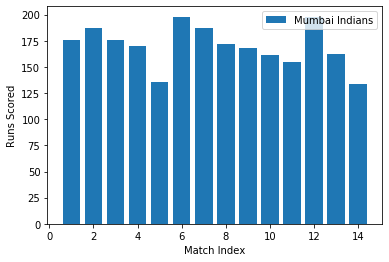

In [63]:
plt.bar(match_no, total_runs_MI, label = 'Mumbai Indians')
plt.xlabel('Match Index')
plt.ylabel('Runs Scored')
plt.legend()
plt.savefig('Match_Scores_MI.png')

In [38]:
MI_2.sort_values(['Team One', 'Team Two'])

,Match ID,Team One,Team Two,Winner,Date,Total Runs
43,1178419,Chennai Super Kings,Mumbai Indians,Mumbai Indians,2019-04-26,155
33,1178409,Delhi Capitals,Mumbai Indians,Mumbai Indians,2019-04-18,168
8,1175364,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,2019-03-30,176
46,1178422,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,2019-04-28,198
14,1175370,Mumbai Indians,Chennai Super Kings,Mumbai Indians,2019-04-03,170
2,1175358,Mumbai Indians,Delhi Capitals,Delhi Capitals,2019-03-24,176
23,1178399,Mumbai Indians,Kings XI Punjab,Mumbai Indians,2019-04-10,198
55,1178431,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,2019-05-05,134
26,1178402,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,2019-04-13,187
30,1178406,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,2019-04-15,172


In [40]:
filt_Team_one = MI_2['Team One'] == 'Mumbai Indians'
filt_Team_two = MI_2['Team Two'] == 'Mumbai Indians'

In [52]:
runs_1 = list(MI_2[filt_Team_one].sort_values(['Team Two'])['Total Runs'])
runs_2 = list(MI_2[filt_Team_two].sort_values(['Team One'])['Total Runs'])
MI_2[filt_Team_one].sort_values(['Team Two'])

,Match ID,Team One,Team Two,Winner,Date,Total Runs
14,1175370,Mumbai Indians,Chennai Super Kings,Mumbai Indians,2019-04-03,170
2,1175358,Mumbai Indians,Delhi Capitals,Delhi Capitals,2019-03-24,176
23,1178399,Mumbai Indians,Kings XI Punjab,Mumbai Indians,2019-04-10,198
55,1178431,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,2019-05-05,134
26,1178402,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,2019-04-13,187
30,1178406,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,2019-04-15,172
50,1178426,Mumbai Indians,Sunrisers Hyderabad,tie,2019-05-02,162


In [57]:
MI_2[filt_Team_two].sort_values(['Team One'])

,Match ID,Team One,Team Two,Winner,Date,Total Runs
43,1178419,Chennai Super Kings,Mumbai Indians,Mumbai Indians,2019-04-26,155
33,1178409,Delhi Capitals,Mumbai Indians,Mumbai Indians,2019-04-18,168
8,1175364,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,2019-03-30,176
46,1178422,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,2019-04-28,198
35,1178411,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,2019-04-20,161
6,1175362,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,2019-03-28,187
18,1178394,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,2019-04-06,136


In [53]:
Team_list = ['CSK', 'DD', 'KXIP', 'KKR', 'RR', 'RCB', 'SRH']

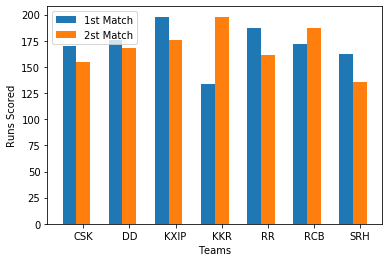

In [60]:
import matplotlib.pyplot as plt1
import numpy as np

width = 0.30
x_indexes = np.arange(len(Team_list))
plt1.bar(x_indexes - width, runs_1, width = width, label = '1st Match')
plt1.bar(x_indexes, runs_2, width = width, label = '2st Match')
plt1.xlabel('Teams')
plt1.ylabel('Runs Scored')
plt1.legend()
plt1.xticks(ticks = x_indexes, labels = Team_list)
plt1.savefig('Match_Compare_MI.png')

In [82]:
filt_Starting = (MI_2['Innings No'] == 1)
filt_Chasing = (MI_2['Innings No'] == 2)
filt_Winning = (MI_2['Winner'] == 'Mumbai Indians')
filt_Losing = ~(MI_2['Winner'] == 'Mumbai Indians')
filt_tie = (MI_2['Winner'] == 'tie') 

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


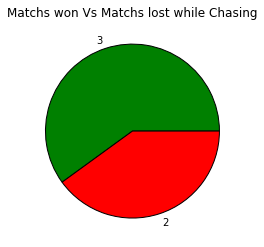

In [86]:
import matplotlib.pyplot as plt2
import numpy as np

slices = [MI_2[filt_Chasing][filt_Winning]['Innings No'].count(), MI_2[filt_Chasing][filt_Losing]['Innings No'].count()]
plt2.title('Matchs won Vs Matchs lost while Chasing')
label = [MI_2[filt_Chasing][filt_Winning]['Innings No'].count(), MI_2[filt_Chasing][filt_Losing]['Innings No'].count()]
color = ['green', 'red']
plt2.pie(slices, labels = label, colors = color,wedgeprops = {'edgecolor' : 'black'})
plt2.savefig('Chasing_MI.png')

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


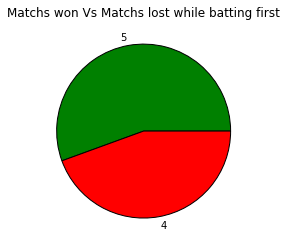

In [87]:
slices = [MI_2[filt_Starting][filt_Winning]['Innings No'].count(), MI_2[filt_Starting][filt_Losing]['Innings No'].count()]
plt2.title('Matchs won Vs Matchs lost while batting first')
label = [MI_2[filt_Starting][filt_Winning]['Innings No'].count(), MI_2[filt_Starting][filt_Losing]['Innings No'].count()]
color = ['green', 'red']
plt2.pie(slices, labels = label, colors = color,wedgeprops = {'edgecolor' : 'black'})
plt2.savefig('Openning_MI.png')

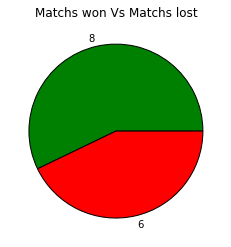

In [88]:
slices = [MI_2[filt_Winning]['Innings No'].count(), MI_2[filt_Losing]['Innings No'].count()]
plt2.title('Matchs won Vs Matchs lost')
label = [MI_2[filt_Winning]['Innings No'].count(), MI_2[filt_Losing]['Innings No'].count()]
color = ['green', 'red']
plt2.pie(slices, labels = label, colors = color,wedgeprops = {'edgecolor' : 'black'})
plt2.savefig('WinsLoses_MI.png')